# Generating EOS
This notebook generates tables of EOSs including a QCD and a vacuum energy phase transition, giving pressure and energy density in G=c=M_sun=1 units. After appropriate rescaling of the final quantities, it can be used in well-known NS integrator, like the RNS code (https://github.com/cgca/rns).

## Import

In [1]:
include("Model_eos_generator.jl")
using DelimitedFiles, Plots, LaTeXStrings

## Load data and useful constants

In [2]:
#LOADING DATA
#Note: the usual dataset for the AP4 and the SLy gave all quantities in g/cm^3
#The dataset in Rescaledsly.dat and Rescaledap4.dat have been rescaled to G=c=M_Sun=1
#The data for the (ρ,c_s) segments are also in G=c=M_Sun=1
#Smaller dataset (100 eos) corresponds to matrixrhoS.dat and matrixcsS.dat
#Larger dataset (1000 eos) corresponds to matrixrhoL.dat and matrixcsL.dat
sly = readdlm("Rescaledsly.dat", Float64) #p,ϵ,ρ
ap4 = readdlm("Rescaledap4.dat", Float64); #p,ϵ,ρ
matrix_ρ = readdlm("matrixrhoS.dat", Float64) #loading ρ coordinates for segments
matrix_cs = readdlm("matrixcsS.dat", Float64); #loading cs coordinates for segments
#matrix_ρ = readdlm("matrixrhoL.dat", Float64) #loading ρ coordinates for segments
#matrix_cs = readdlm("matrixcsL.dat", Float64); #loading cs coordinates for segments

In [3]:
#USEFUL CONSTANTS FOR RESCALING UNITS
const cspeed = 2.997 * 10.0^10 #in cm s^-1
const hbar = 6.582 * 10.0^-22 #in Mev s
const MeV = 1.602 * 10.0^-6 #in g cm^2 s^-1
const Kp = MeV/(hbar^3 * cspeed^3) #transforming a pressure in Mev^4 in g/cm/s^2
const Kρ = MeV/(hbar^3 * cspeed^5) #transforming a mass density in Mev^4 in g/cm^3
const fm = (10.0^-13)^-3 #fm^-3 in cm^-3
const n0 = 0.16 * fm #nuclear saturation density in cm^-3
const m = 1.675 * 10.0^-24 #neutron mass in g
const Msun = 1.988 * 10.0^33 #mass of the Sun in g
const Gconst = 6.67 * 10.0^-11 * 10.0^6/10.0^3 #in cm^3/g/s^2
const Lu = Msun^-1 * cspeed^2 * Gconst^-1 #1cm in G=c=Msun=1
const Pu = Msun^-1 / Lu^3 / cspeed^2  #transforming a pressure in g/cm/s^2 in G=c=Msun=1 units
const ρu = Msun^-1 / Lu^3; #transforming a mass density in g/cm^3 in G=c=Msun=1 units

## Computation

In [4]:
const ρt = 2.0 * n0 * m * ρu; #mass density when QCD transition happens
const ρfin = 12.0 * n0 * m * ρu #highest mass density we decide to reach for QCD part
const pc = 200.0^4 * Kp *Pu #threshold corresponds to QCD scale
#Possible values of Λ
Λarray = [-194^4 * Kp * Pu, -150^4 * Kp * Pu, -120^4 * Kp * Pu, -95^4 * Kp * Pu,
    -50^4 * Kp * Pu, 0.0, 50^4 * Kp * Pu, 95^4 * Kp * Pu, 120^4 * Kp * Pu, 194^4 * Kp * Pu];

In [5]:
Λ = Λarray[10] #Vacuum energy shift value from array
z = 45 #For small dataset between (1,100), for larger between (1,1000)
#Choose low-density EOS
eos = ap4 #ap4 #sly

#Introduce QCD phase into EOS - choose dataset in "Load data and useful constants"
eos_matrix = Matrix{Float64}(undef,0,3)
eos_matrix = build(eos_matrix, eos, matrix_ρ, matrix_cs, z)

#The following gives matrix for complete eos, including Λ transition: 
#1) pressure, 2) energy density, both quantities are in c=G=M_sun=1 units
#to restore units to g/cm^3 divide values by ρu, given in "Load data and useful constants"
eos_complete = Matrix{Float64}(undef,0,2)
eos_complete = Λtransition(eos_complete, eos_matrix);
#Store complete EOS
writedlm( "Data/ap4p194z45.dat",  eos_complete, ' ')

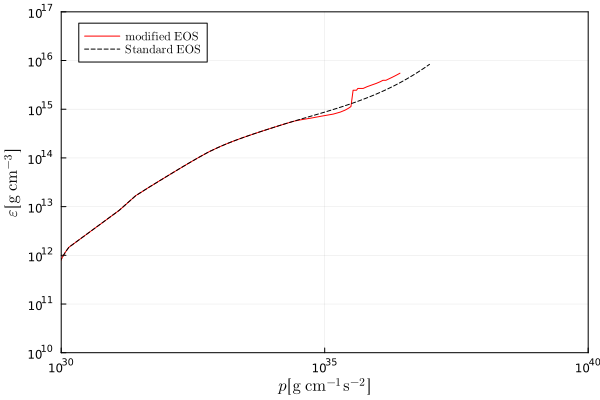

In [6]:
#Plot EOS in g,cm,s units
plot(eos_complete[:,1]./Pu,eos_complete[:,2]./ρu, xscale=:log10,yscale=:log10, 
    xlims = (10.0^30,10.0^40), ylims = (10.0^10, 10.0^17),
    color=:red, framestyle=:box, label=L"\textrm{modified\ EOS}", legend=:topleft,
     xlabel=L"p[\textrm{g\ cm^{-1} s^{-2}}]", ylabel=L"\epsilon[\textrm{g\ cm^{-3}}]")
plot!(eos[:,1]./Pu,eos[:,2]./ρu, xscale=:log10,yscale=:log10, color=:black,
    linestyle=:dash, label=L"\textrm{Standard \ EOS}")